In [4]:
suppressMessages(library(anndataR))
suppressMessages(library(Seurat))

In [5]:
in_dir <- '../../results/07_marchphages/02_annotate'
out_dir <- '../../results/07_marchphages/13_find_marker'

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)

}

In [6]:
adata = anndataR::read_h5ad(glue::glue("{in_dir}/adata.h5ad"))

In [7]:
adata

AnnData object with n_obs × n_vars = 1618 × 15275
    obs: 'patient_id', 'condition', 'cell_type', 'data', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'sub_clusters', 'annotation'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
# convert data to Seurat object
counts <- t(as.matrix(adata$layers$counts))
colnames(counts) <- adata$obs_names
rownames(counts) <- adata$var_names

metadata <- as.data.frame(adata$obs)
obj <- CreateSeuratObject(counts = counts, assay = "RNA")
obj <- AddMetaData(obj, metadata)

# add PCA and UMAP
df_pca <- as.matrix(adata$obsm$X_pca_harmony)
rownames(df_pca) <- adata$obs_names

df_umap <- as.matrix(adata$obsm$X_umap)
rownames(df_umap) <- adata$obs_names

obj[["PCA"]] <- CreateDimReducObject(embeddings = df_pca, 
                                             key = "PCA_", 
                                             assay = DefaultAssay(obj))

obj[["UMAP"]] <- CreateDimReducObject(embeddings = df_umap, 
                                             key = "UMAP_", 
                                             assay = DefaultAssay(obj))

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Warning message:
“No columnames present in cell embeddings, setting to 'PCA_1:50'”
Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


In [9]:
obj

An object of class Seurat 
15275 features across 1618 samples within 1 assay 
Active assay: RNA (15275 features, 0 variable features)
 1 layer present: counts
 2 dimensional reductions calculated: PCA, UMAP

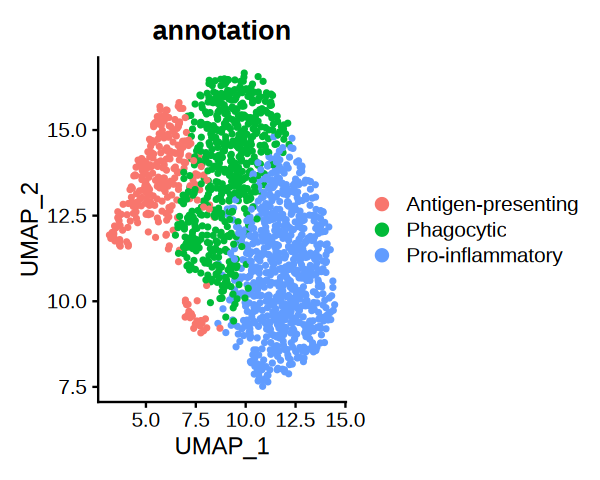

In [10]:
options(repr.plot.height = 4, repr.plot.width = 5)

DimPlot(obj, group.by = "annotation")

In [11]:
obj <- NormalizeData(obj)

Normalizing layer: counts



In [12]:
Idents(obj) <- "annotation"

In [13]:
markers <- FindAllMarkers(obj, assay = "RNA", min.pct = 0.01, only.pos = TRUE)

Calculating cluster Antigen-presenting

Calculating cluster Phagocytic

Calculating cluster Pro-inflammatory



In [14]:
markers <- subset(markers, p_val_adj < 0.05)

In [15]:
write.csv(markers, glue::glue("{out_dir}/markers.csv"), row.names=FALSE)

In [17]:
head(markers, n = 20)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
ACTB,3.523186e-16,0.8182280,0.972,0.969,5.381666e-12,Antigen-presenting,ACTB
CD74,1.119214e-13,0.5303555,0.993,0.992,1.709599e-09,Antigen-presenting,CD74
LPL,1.529063e-13,3.7438208,0.112,0.022,2.335644e-09,Antigen-presenting,LPL
RPL26,2.086015e-13,0.6633879,0.898,0.898,3.186388e-09,Antigen-presenting,RPL26
B2M,1.112286e-10,0.4309227,0.993,0.997,1.699017e-06,Antigen-presenting,B2M
SPP1,3.275834e-10,2.8407233,0.081,0.015,5.003836e-06,Antigen-presenting,SPP1
CD1E,8.658698e-10,5.4891900,0.046,0.004,1.322616e-05,Antigen-presenting,CD1E
RPL27A,2.407316e-09,0.5691517,0.877,0.886,3.677174e-05,Antigen-presenting,RPL27A
SH3BGRL3,2.854214e-09,1.0138870,0.663,0.616,4.359812e-05,Antigen-presenting,SH3BGRL3
